In [117]:
# Install necessary packages (if not already installed)
!pip install pandas seaborn matplotlib

In [118]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
# Define the file paths

# ** UPDATE WITH YOUR FILEPATHS **

input_file_path = 'D:/Project2/Raw_Airline_Delay_Data_March2024.csv'
output_file_path = 'D:/Project2/Processed_Airline_Delay_Data_March2024.csv'

In [120]:
# Load the dataset and create brief metadata
dataset_source = 'https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp'
df = pd.read_csv(input_file_path)

# Create metadata
metadata = {
    'Dataset Source': dataset_source,
    'Number of Records': df.shape[0],
    'Number of Columns': df.shape[1]
}
print("Metadata:\n", metadata)


Metadata:
 {'Dataset Source': 'https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp', 'Number of Records': 1868, 'Number of Columns': 21}


In [121]:
# Inspect the headers
print("\nHeaders:\n", df.columns)


Headers:
 Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


In [122]:
# Rename the columns
df.rename(columns={
    'carrier': 'AirlineCode',
    'carrier_name': 'AirlineName',
    'airport': 'AirportCode',
    'airport_name': 'AirportName',
    'arr_flights': 'Count_Arrivals',
    'arr_del15': 'Count_ArrFlights_Delayed15PlusMin',
    'carrier_ct': 'Count_Airline_Delay',
    'weather_ct': 'Count_Weather_Delay',
    'nas_ct': 'Count_NAS_Delay',
    'security_ct': 'Count_Security_Delay',
    'late_aircraft_ct': 'Count_LateAircraft_Delay',
    'arr_cancelled': 'Count_Arrivals_Cancelled',
    'arr_diverted': 'Count_Arrivals_Diverted',
    'arr_delay': 'TotalMinutes_Arrivals_Delay',
    'carrier_delay': 'TotalMinutes_Airline_Delay',
    'weather_delay': 'TotalMinutes_Weather_Delay',
    'nas_delay': 'TotalMinutes_NAS_Delay',
    'security_delay': 'TotalMinutes_Security_Delay',
    'late_aircraft_delay': 'TotalMinutes_LateAircraft_Delay'
}, inplace=True)


In [123]:
# Inspect the first few rows of the dataset to verify renaming
print("\nRenamed Data (First 5 Rows):\n", df.head())


Renamed Data (First 5 Rows):
    year  month AirlineCode        AirlineName AirportCode  \
0  2024      3          9E  Endeavor Air Inc.         ABE   
1  2024      3          9E  Endeavor Air Inc.         ABY   
2  2024      3          9E  Endeavor Air Inc.         AEX   
3  2024      3          9E  Endeavor Air Inc.         AGS   
4  2024      3          9E  Endeavor Air Inc.         ALB   

                                         AirportName  Count_Arrivals  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...            88.0   
1             Albany, GA: Southwest Georgia Regional             1.0   
2           Alexandria, LA: Alexandria International            62.0   
3        Augusta, GA: Augusta Regional at Bush Field           129.0   
4                   Albany, NY: Albany International           111.0   

   Count_ArrFlights_Delayed15PlusMin  Count_Airline_Delay  \
0                                5.0                 1.78   
1                                0.0           

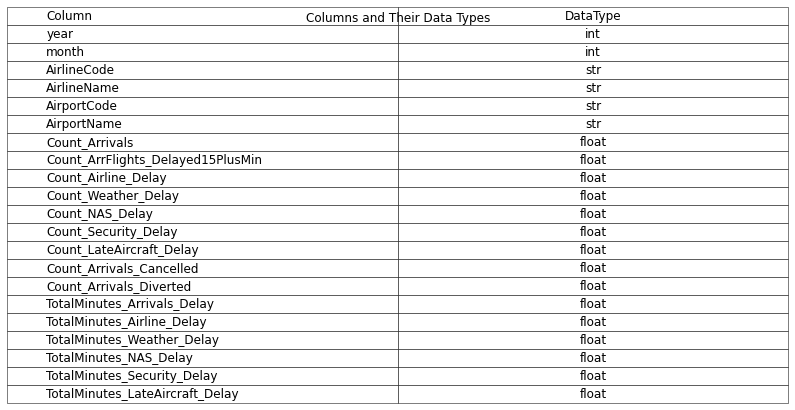

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Inspect the full columns and their data types
column_types = df.dtypes.to_frame(name='DataType').reset_index().rename(columns={'index': 'Column'})

# Shorten DataType strings for better readability
column_types['DataType'] = column_types['DataType'].astype(str).str.replace('float64', 'float').str.replace('int64', 'int').str.replace('object', 'str')

# Display the column types using matplotlib
fig, ax = plt.subplots(figsize=(14, 6))  # set size frame
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=column_types.values,
                     colLabels=column_types.columns,
                     cellLoc='left',
                     loc='center')

the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1, 1.5)

# Adjust the column widths
for key, cell in the_table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(0.5)
    if key[1] == 0:
        cell.set_text_props(ha='left')  # Left justify the column text
    if key[1] == 1:
        cell.set_text_props(ha='center')  # Center align the data type text

plt.title('Columns and Their Data Types', pad=20)
plt.show()


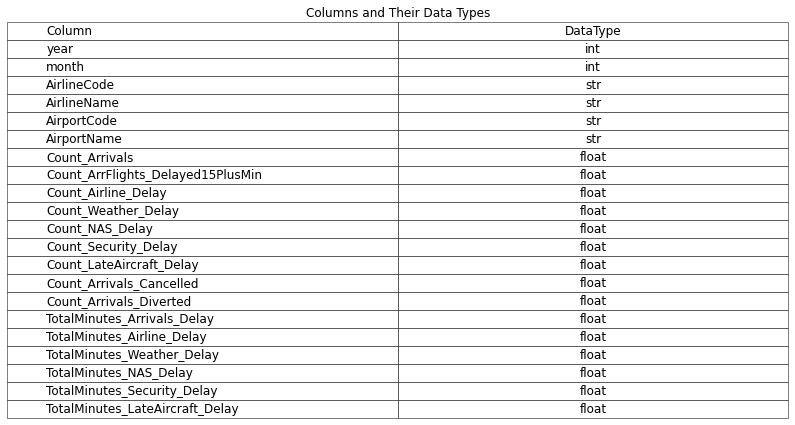

In [125]:
# Inspect the full columns and their data types
column_types = df.dtypes.to_frame(name='DataType').reset_index().rename(columns={'index': 'Column'})

# Shorten DataType strings for better readability
column_types['DataType'] = column_types['DataType'].astype(str).str.replace('float64', 'float').str.replace('int64', 'int').str.replace('object', 'str')

# Display the column types using matplotlib
fig, ax = plt.subplots(figsize=(14, 6))  # set size frame
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=column_types.values,
                     colLabels=column_types.columns,
                     cellLoc='left',
                     loc='center')

the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1, 1.5)

# Adjust the column widths
for key, cell in the_table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(0.5)
    if key[1] == 0:
        cell.set_text_props(ha='left')  # Left justify the column text
    if key[1] == 1:
        cell.set_text_props(ha='center')  # Center align the data type text

plt.title('Columns and Their Data Types', pad=40)
plt.show()



In [126]:

# Inspect the full columns and their data types
print("\nFull Columns and Data Types:\n", df.dtypes)


Full Columns and Data Types:
 year                                   int64
month                                  int64
AirlineCode                           object
AirlineName                           object
AirportCode                           object
AirportName                           object
Count_Arrivals                       float64
Count_ArrFlights_Delayed15PlusMin    float64
Count_Airline_Delay                  float64
Count_Weather_Delay                  float64
Count_NAS_Delay                      float64
Count_Security_Delay                 float64
Count_LateAircraft_Delay             float64
Count_Arrivals_Cancelled             float64
Count_Arrivals_Diverted              float64
TotalMinutes_Arrivals_Delay          float64
TotalMinutes_Airline_Delay           float64
TotalMinutes_Weather_Delay           float64
TotalMinutes_NAS_Delay               float64
TotalMinutes_Security_Delay          float64
TotalMinutes_LateAircraft_Delay      float64
dtype: object



Diagnostics Statistics:
                                       count      mean        std        -2SD  \
year                               1,868.00  2,024.00       0.00    2,024.00   
month                              1,868.00      3.00       0.00        3.00   
Count_Arrivals                     1,865.00    337.15     971.08   -1,605.02   
Count_ArrFlights_Delayed15PlusMin  1,865.00     68.23     196.67     -325.11   
Count_Airline_Delay                1,865.00     20.20      51.43      -82.66   
Count_Weather_Delay                1,865.00      1.88       7.51      -13.15   
Count_NAS_Delay                    1,865.00     20.16      65.98     -111.81   
Count_Security_Delay               1,865.00      0.21       0.82       -1.43   
Count_LateAircraft_Delay           1,865.00     25.79      83.94     -142.10   
Count_Arrivals_Cancelled           1,865.00      2.88      11.59      -20.30   
Count_Arrivals_Diverted            1,865.00      0.71       3.00       -5.29   
TotalMinutes_A

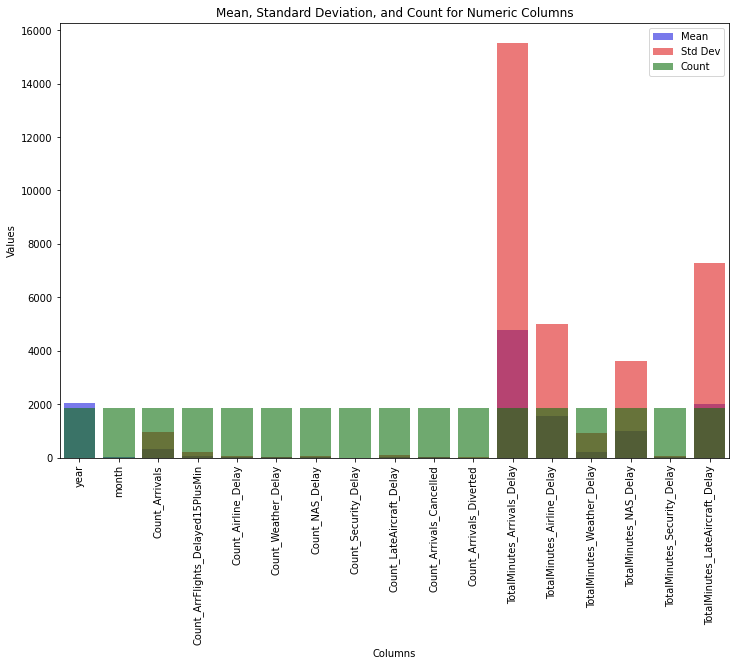

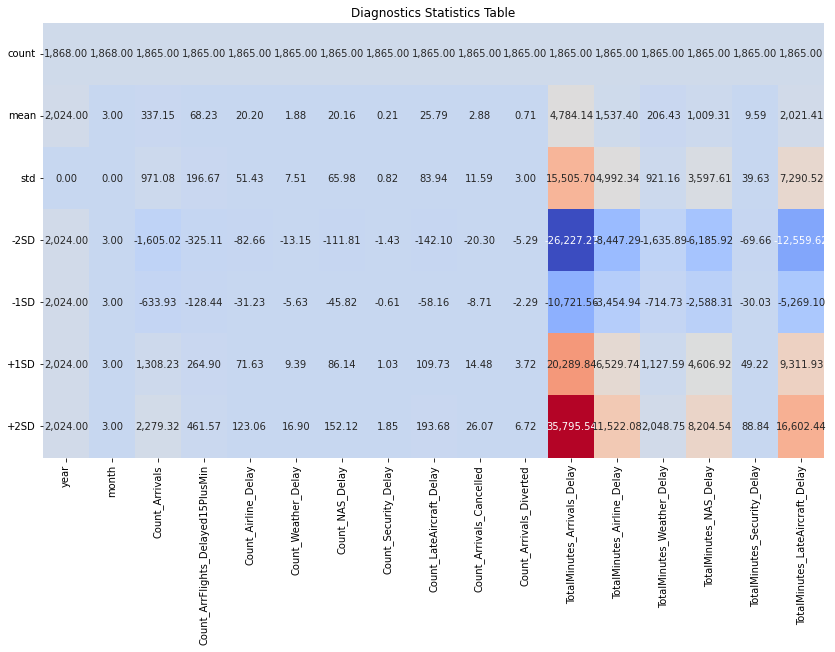

In [127]:

# Calculate mean, standard deviation, and diagnostics
diagnostics_stats = numeric_cols.describe().loc[['count', 'mean', 'std']].T

# Calculate -2SD, -1SD, +1SD, and +2SD
diagnostics_stats['-2SD'] = diagnostics_stats['mean'] - 2 * diagnostics_stats['std']
diagnostics_stats['-1SD'] = diagnostics_stats['mean'] - diagnostics_stats['std']
diagnostics_stats['+1SD'] = diagnostics_stats['mean'] + diagnostics_stats['std']
diagnostics_stats['+2SD'] = diagnostics_stats['mean'] + 2 * diagnostics_stats['std']

# Round to two decimal places
diagnostics_stats_rounded = diagnostics_stats.round(2)

# Format with commas for display
diagnostics_stats_formatted = diagnostics_stats_rounded.applymap(lambda x: f"{x:,.2f}")

# Display diagnostics statistics
print("\nDiagnostics Statistics:\n", diagnostics_stats_formatted)

# Plot diagnostics statistics using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=diagnostics_stats.index, y=diagnostics_stats['mean'], color='blue', alpha=0.6, label='Mean')
sns.barplot(x=diagnostics_stats.index, y=diagnostics_stats['std'], color='red', alpha=0.6, label='Std Dev')
sns.barplot(x=diagnostics_stats.index, y=diagnostics_stats['count'], color='green', alpha=0.6, label='Count')

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Mean, Standard Deviation, and Count for Numeric Columns')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Display the diagnostics table using seaborn
plt.figure(figsize=(14, 8))
sns.heatmap(diagnostics_stats_rounded.T, annot=diagnostics_stats_formatted.T, fmt="", cmap='coolwarm', cbar=False)
plt.title('Diagnostics Statistics Table')
plt.yticks(rotation=0)
plt.show()


In [128]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate summary statistics
summary_stats = numeric_cols.describe().T

# Calculate range (max - min)
summary_stats['range'] = summary_stats['max'] - summary_stats['min']

# Calculate Q2 (25th percentile) and Q3 (75th percentile)
summary_stats['Q2'] = numeric_cols.quantile(0.25)
summary_stats['Q3'] = numeric_cols.quantile(0.75)

# Add median
summary_stats['median'] = numeric_cols.median()

# Rearrange columns for better readability
summary_stats = summary_stats[['count', 'range', 'min', 'Q2', 'median', 'Q3', 'max']]

# Display summary statistics
print("\nSummary Statistics:\n", summary_stats)

# Identify outliers using 1.5 IQR rule
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))



Summary Statistics:
                                     count      range     min       Q2  \
year                               1868.0       0.00  2024.0  2024.00   
month                              1868.0       0.00     3.0     3.00   
Count_Arrivals                     1865.0   18809.00     1.0    42.00   
Count_ArrFlights_Delayed15PlusMin  1865.0    3651.00     0.0     6.00   
Count_Airline_Delay                1865.0     844.69     0.0     2.00   
Count_Weather_Delay                1865.0     199.53     0.0     0.00   
Count_NAS_Delay                    1865.0     992.82     0.0     1.03   
Count_Security_Delay               1865.0      15.01     0.0     0.00   
Count_LateAircraft_Delay           1865.0    1614.92     0.0     1.20   
Count_Arrivals_Cancelled           1865.0     237.00     0.0     0.00   
Count_Arrivals_Diverted            1865.0      81.00     0.0     0.00   
TotalMinutes_Arrivals_Delay        1865.0  361570.00     0.0   320.00   
TotalMinutes_Airline_Delay   

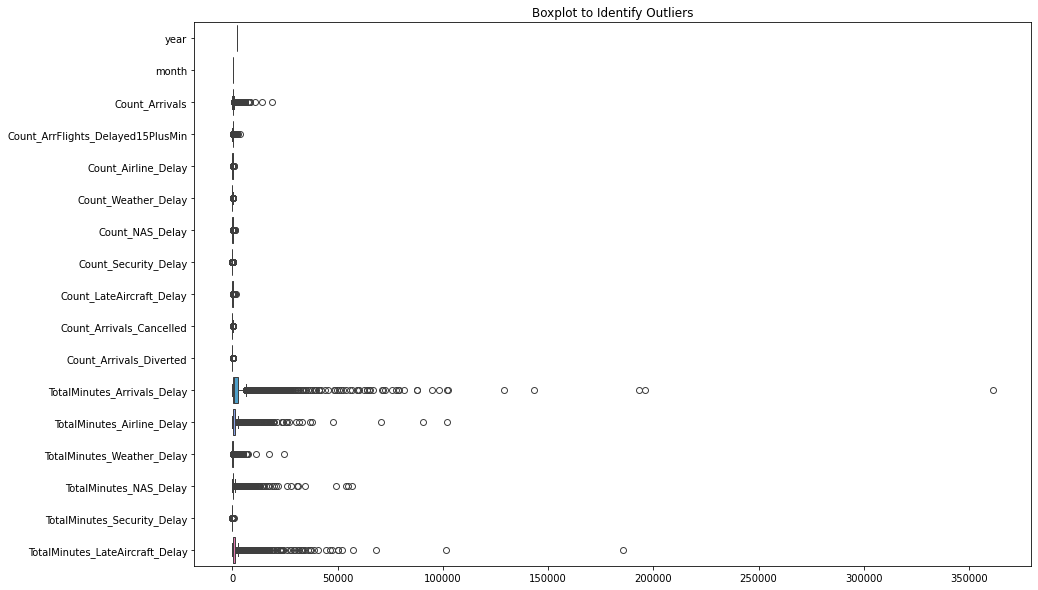


Data Shape After Removing Outliers:
 (1280, 21)


In [129]:
# Boxplot to identify outliers in numeric columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_cols, orient='h')
plt.title('Boxplot to Identify Outliers')
plt.show()

# Example: Remove outliers beyond 1.5 IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df_no_outliers = df[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nData Shape After Removing Outliers:\n", df_no_outliers.shape)



Outliers:
       RowNumber AirportCode  \
4             4         ALB   
5             5         ATL   
10           10         BGR   
12           12         BMI   
26           26         CRW   
...         ...         ...   
1850       1850         IND   
1852       1852         JFK   
1854       1854         LGA   
1860       1860         MIA   
1861       1861         MKE   

                                            AirportName AirlineCode  \
4                      Albany, NY: Albany International          9E   
5     Atlanta, GA: Hartsfield-Jackson Atlanta Intern...          9E   
10                     Bangor, ME: Bangor International          9E   
12    Bloomington/Normal, IL: Central Il Regional Ai...          9E   
26    Charleston/Dunbar, WV: West Virginia Internati...          9E   
...                                                 ...         ...   
1850       Indianapolis, IN: Indianapolis International          YX   
1852        New York, NY: John F. Kennedy Inter

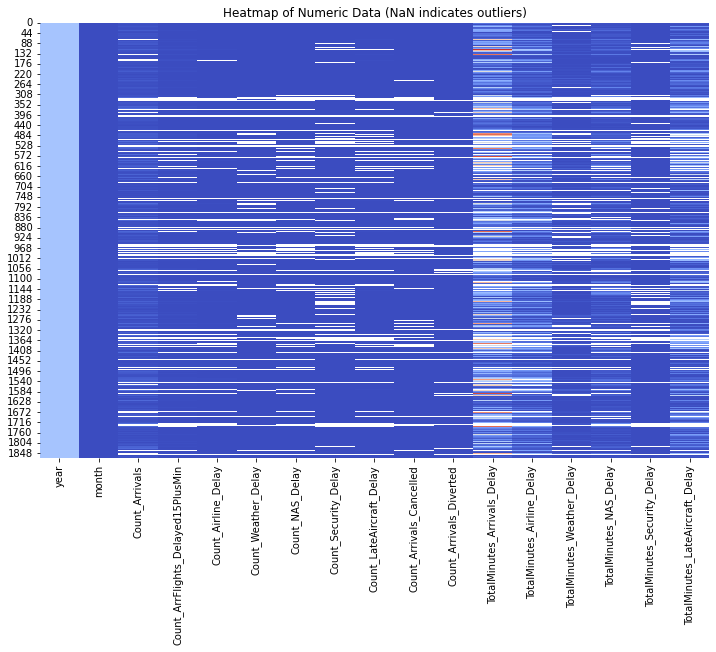

In [130]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate Q1, Q3, and IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

# Filter rows with any outliers
outlier_rows = df[outliers.any(axis=1)].copy()

# Add row numbers
outlier_rows['RowNumber'] = outlier_rows.index

# Select relevant columns
outlier_rows = outlier_rows[['RowNumber', 'AirportCode', 'AirportName', 'AirlineCode', 'AirlineName'] + numeric_cols.columns.tolist()]

# Display the outliers
print("\nOutliers:\n", outlier_rows)

# Save the outliers to a CSV file for further inspection
outliers_file_path = 'D:/Project2/Outliers.csv'
outlier_rows.to_csv(outliers_file_path, index=False)
print(f"\nOutliers have been saved to {outliers_file_path}")

# Prepare the data for the heatmap
heatmap_data = numeric_cols.copy()
heatmap_data[outliers] = float('nan')  # Mark outliers with NaN for visualization

# Create a heatmap to visualize outliers
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar=False)
plt.title('Heatmap of Numeric Data (NaN indicates outliers)')
plt.show()


### **The outliers appear to be valid and will help identify problem areas in our SQL queries, so we will retain them..  But we are aware they are present.**

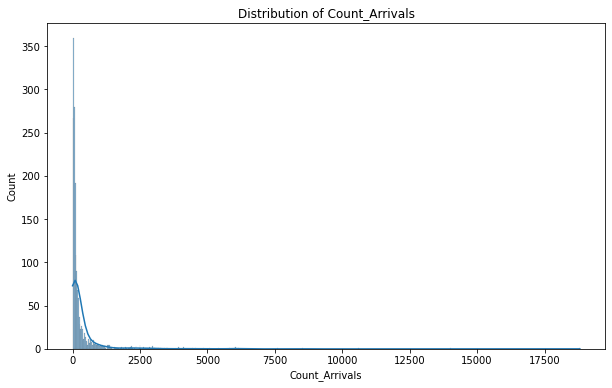

In [131]:
# Basic visualizations using seaborn
# Distribution of Count_Arrivals
plt.figure(figsize=(10, 6))
sns.histplot(df['Count_Arrivals'], kde=True)
plt.title('Distribution of Count_Arrivals')
plt.show()

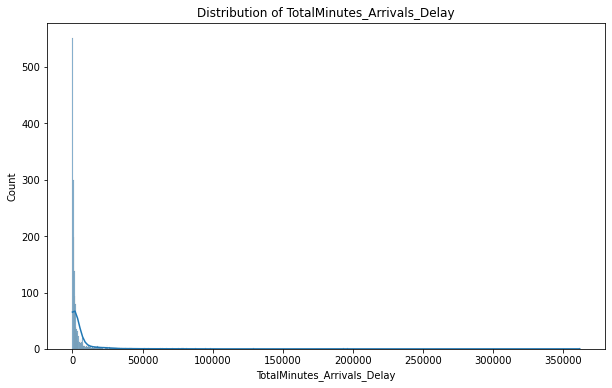

In [132]:
# Distribution of TotalMinutes_Arrivals_Delay
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalMinutes_Arrivals_Delay'], kde=True)
plt.title('Distribution of TotalMinutes_Arrivals_Delay')
plt.show()

In [133]:
# Search for duplicates
duplicates = df[df.duplicated()]
print("\nDuplicates:\n", duplicates)


Duplicates:
 Empty DataFrame
Columns: [year, month, AirlineCode, AirlineName, AirportCode, AirportName, Count_Arrivals, Count_ArrFlights_Delayed15PlusMin, Count_Airline_Delay, Count_Weather_Delay, Count_NAS_Delay, Count_Security_Delay, Count_LateAircraft_Delay, Count_Arrivals_Cancelled, Count_Arrivals_Diverted, TotalMinutes_Arrivals_Delay, TotalMinutes_Airline_Delay, TotalMinutes_Weather_Delay, TotalMinutes_NAS_Delay, TotalMinutes_Security_Delay, TotalMinutes_LateAircraft_Delay]
Index: []

[0 rows x 21 columns]


In [134]:
# Check that all airport names are dependent on airport codes
airport_dependency = df.groupby('AirportCode')['AirportName'].nunique()
independent_airport_names = airport_dependency[airport_dependency > 1]
print("\nIndependent Airport Names:\n", independent_airport_names)


Independent Airport Names:
 Series([], Name: AirportName, dtype: int64)


In [135]:
# Check that all airline names are dependent on airline codes
airline_dependency = df.groupby('AirlineCode')['AirlineName'].nunique()
independent_airline_names = airline_dependency[airline_dependency > 1]
print("\nIndependent Airline Names:\n", independent_airline_names)


Independent Airline Names:
 Series([], Name: AirlineName, dtype: int64)


In [136]:
# Search for missing values in dimension columns
missing_values_dimensions = df[['AirlineCode', 'AirlineName', 'AirportCode', 'AirportName']].isnull().sum()
print("\nMissing Values in Dimension Columns:\n", missing_values_dimensions)


Missing Values in Dimension Columns:
 AirlineCode    0
AirlineName    0
AirportCode    0
AirportName    0
dtype: int64


In [137]:
# Search for missing values in numeric data columns
missing_values_numeric = df[['Count_Arrivals', 'Count_ArrFlights_Delayed15PlusMin', 'Count_Airline_Delay', 'Count_Weather_Delay', 'Count_NAS_Delay', 'Count_Security_Delay', 'Count_LateAircraft_Delay', 'Count_Arrivals_Cancelled', 'Count_Arrivals_Diverted', 'TotalMinutes_Arrivals_Delay', 'TotalMinutes_Airline_Delay', 'TotalMinutes_Weather_Delay', 'TotalMinutes_NAS_Delay', 'TotalMinutes_Security_Delay', 'TotalMinutes_LateAircraft_Delay']].isnull().sum()

# Print missing values in numeric data columns
print("\nMissing Values in Numeric Data Columns:\n", missing_values_numeric)



Missing Values in Numeric Data Columns:
 Count_Arrivals                       3
Count_ArrFlights_Delayed15PlusMin    3
Count_Airline_Delay                  3
Count_Weather_Delay                  3
Count_NAS_Delay                      3
Count_Security_Delay                 3
Count_LateAircraft_Delay             3
Count_Arrivals_Cancelled             3
Count_Arrivals_Diverted              3
TotalMinutes_Arrivals_Delay          3
TotalMinutes_Airline_Delay           3
TotalMinutes_Weather_Delay           3
TotalMinutes_NAS_Delay               3
TotalMinutes_Security_Delay          3
TotalMinutes_LateAircraft_Delay      3
dtype: int64


### **There are 3 rows with NULLS - less than 1% - we will keep it and manage with SQL**

In [139]:
import pandas as pd

# Function to check for leading or trailing whitespace in string columns
def check_and_trim_whitespace(df):
    trimmed = df.copy()
    for col in trimmed.select_dtypes(include=['object']).columns:
        # Check for leading or trailing whitespace
        if trimmed[col].str.contains(r'^\s+|\s+$').any():
            print(f"Trimming whitespace in column: {col}")
            # Trim whitespace
            trimmed[col] = trimmed[col].str.strip()
    return trimmed

# Apply the function to the DataFrame
df_trimmed = check_and_trim_whitespace(df)

# Verify the changes
for col in df_trimmed.select_dtypes(include=['object']).columns:
    whitespace_present = df_trimmed[col].str.contains(r'^\s+|\s+$').any()
    print(f"Column '{col}' - Leading or trailing whitespace present: {whitespace_present}")

# Display the first few rows of the cleaned data
print("\nFirst 5 Rows of Cleaned Data:\n", df_trimmed.head())



Column 'AirlineCode' - Leading or trailing whitespace present: False
Column 'AirlineName' - Leading or trailing whitespace present: False
Column 'AirportCode' - Leading or trailing whitespace present: False
Column 'AirportName' - Leading or trailing whitespace present: False

First 5 Rows of Cleaned Data:
    year  month AirlineCode        AirlineName AirportCode  \
0  2024      3          9E  Endeavor Air Inc.         ABE   
1  2024      3          9E  Endeavor Air Inc.         ABY   
2  2024      3          9E  Endeavor Air Inc.         AEX   
3  2024      3          9E  Endeavor Air Inc.         AGS   
4  2024      3          9E  Endeavor Air Inc.         ALB   

                                         AirportName  Count_Arrivals  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...            88.0   
1             Albany, GA: Southwest Georgia Regional             1.0   
2           Alexandria, LA: Alexandria International            62.0   
3        Augusta, GA: Augusta Regiona